In [3]:
pow(9,1/2)

3.0

In [172]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')

from math import sqrt
from math import exp
from math import pi
import math

import numpy as np 
import pandas as pd

import scipy.integrate as integrate 
from scipy.optimize import root
import matplotlib.pyplot as plt

from scipy.special import i0 
from scipy.special import i1 
!namics "/home/tpopova/prj/PB_SCF/pore_templates/dendr_pore_template.in"

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 6.133424e-01 |g| = 8.296304e-01 alpha = 1.000000e+00 
hessian scaling: 1.18556
it =  1  E = 5.365605e-01 |g| = 6.984075e-01 alpha = 2.205356e-01 
it =  2  E = 6.287975e-01 |g| = 7.057163e-01 alpha = 1.526597e-01 
it =  3  E = 1.439011e+00 |g| = 6.564868e-01 alpha = 2.506166e-02 
it =  4  E = 8.594739e-01 |g| = 6.588277e-01 alpha = 6.577317e-02 
it =  5  E = 2.281532e+00 |g| = 6.149347e-01 alpha = 8.137308e-03 
it =  6  E = 7.711095e-01 |g| = 6.283960e-01 alpha = 6.855420e-02 
it =  7  E = 1.837448e+00 |g| = 6.697186e-01 alpha = 1.370552e-02 
it =  8  E = 9.253000e-01 |g| = 6.804219e-01 alpha = 5.173728e-02 
it =  9  E = 3.072885e+00 |g| = 7.000893e-01 alpha = 5.133304e-03 
it =  10  E = 1.422749e+00 |g| = 6.945351e-01

it =  46  E = 4.134750e-01 |g| = 2.911925e-01 alpha = 3.485865e-02 
it =  47  E = 3.953626e-01 |g| = 2.811374e-01 alpha = 3.612075e-02 
it =  48  E = 3.775248e-01 |g| = 2.710551e-01 alpha = 3.749253e-02 
it =  49  E = 3.599557e-01 |g| = 2.609420e-01 alpha = 3.898673e-02 
it =  50  E = 3.426491e-01 |g| = 2.507948e-01 alpha = 4.061825e-02 
it =  51  E = 3.255993e-01 |g| = 2.406104e-01 alpha = 4.240467e-02 
it =  52  E = 3.088009e-01 |g| = 2.303857e-01 alpha = 4.436682e-02 
it =  53  E = 2.922484e-01 |g| = 2.201178e-01 alpha = 4.652959e-02 
it =  54  E = 2.759368e-01 |g| = 2.098041e-01 alpha = 4.892292e-02 
it =  55  E = 2.598612e-01 |g| = 1.994420e-01 alpha = 5.158313e-02 
it =  56  E = 2.440170e-01 |g| = 1.890293e-01 alpha = 5.455476e-02 
it =  57  E = 2.283999e-01 |g| = 1.785640e-01 alpha = 5.789293e-02 
it =  58  E = 2.130058e-01 |g| = 1.680444e-01 alpha = 6.166679e-02 
it =  59  E = 1.978309e-01 |g| = 1.574692e-01 alpha = 6.596417e-02 
it =  60  E = 1.828717e-01 |g| = 1.468376e-01 al

In [173]:
lb = 1
Cs = 0.001
alpha = 0.5
n = 30
q = 4
D = 80
S = 1000

N = n * (1 + q)
# N = n * (1 + q + q**2)

l_t = S/(2*pi*D)

#theta
theta = N/l_t
theta
print(N,theta)

150 75.39822368615503


In [174]:

# inverse Debye length
K: float = sqrt(8 * pi * lb * Cs)

k_coef = n**(-1) * math.atan(1/sqrt(q))
H_0: float = sqrt(2/3) * (alpha**(1/2))/k_coef

#dzeta b
zeta_b: float = (2 * pi * D * lb * alpha * N)/S

def find_h(h):

    t_lambda = H_0/h

    rho = h * (D/H_0 - h)

    c_plus = (K*H_0/2)**2 * np.exp(h**2 + 2/(K*t_lambda) * i0((D-h*H_0)*K)/i1((D-h*H_0)*K))\
        * (D/H_0 * (integrate.quad(lambda t: np.exp(-t ** 2), 0, h)[0]) - (1 - np.exp(-1 * h**2))/2)

    c_minus = (K*H_0/2)**2 * np.exp(-1 * h**2 - 2/(K*t_lambda) * i0((D-h*H_0)*K)/i1((D-h*H_0)*K))\
        * (D/H_0 * (integrate.quad(lambda t: np.exp(t ** 2), 0, h)[0]) - (np.exp(h**2) - 1)/2)
        
    return rho + c_plus - c_minus - zeta_b

h_solution = root(lambda h: find_h(h), 0.01, method='lm')

H = h_solution.x * H_0

t_lambda_answ = H_0/h_solution.x

def psi_out(r, tLambda, H_):
        return -2/(K*tLambda) * (i0(r*K))/(i1((D-H_)*K))
    
def psi_in(r, tLambda, H_):
    first = ((D-r)**2 - H_**2)/H_0**2
    psi_H = -2/(K*tLambda) * (i0((D-H_)*K))/(i1((D-H_)*K))
    return first + psi_H

r_in_range = np.linspace(D, D-H[0], num = 500)
r_out_range = np.linspace(D-H[0], 0, num = 500)

psi_in_range = psi_in(r_in_range, t_lambda_answ, H)
psi_out_range = psi_out(r_out_range, t_lambda_answ, H)

In [175]:
data = pd.read_csv("/home/tpopova/prj/PB_SCF/pore_main/dendron_pore/output/dendr_pore_template.pro", sep='\t')['sys_noname_psi']

Text(0, 0.5, '$\\psi$')

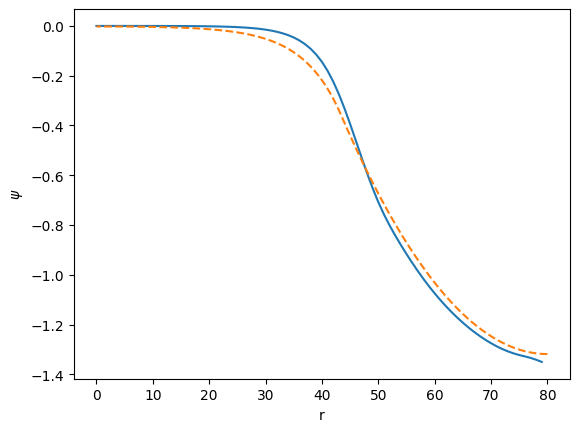

In [176]:
plt.plot(data)
plt.plot(np.hstack((r_in_range, r_out_range)), np.hstack((psi_in_range, psi_out_range)), linestyle = '--')
plt.xlabel("r")
plt.ylabel(r'$\psi$')

In [177]:
spacers = n
dendron_2_2 = f"(Р0)1(P){spacers}[(P){spacers}[(P){spacers}][(P){spacers}](P){spacers}][(P){spacers}[(P){spacers}][(P){spacers}](P){spacers}](P){spacers}[(P){spacers}][(P){spacers}](P){spacers}"

In [178]:
dendron_2_2

'(Р0)1(P)30[(P)30[(P)30][(P)30](P)30][(P)30[(P)30][(P)30](P)30](P)30[(P)30][(P)30](P)30'